# Inspiration
- EDA: 
    - https://www.kaggle.com/code/shubhamgadekar/complete-drug-review-analytics
    - https://www.kaggle.com/code/sumitm004/eda-and-sentiment-analysis


- https://www.kaggle.com/code/neilash/team-ndl-algorithms-and-illnesses/notebook
    - What insights can we gain from exploring and visualizing our data?
    - How does sentiment play into rating and usefulness of reviews?
    - Can we create a way for people to find the best medication for their illness?
    - What machine learning models work best for predicting the sentiment or rating based on review?


- https://www.kaggle.com/code/chocozzz/recommendation-medicines-by-using-a-review/notebook
5 mest hyppige sygdomme
    - Recommendation Medicines by using a review 
    - They did a really thorough job all the way from data explorations to preprocessing the data in an interesting manner that helped to produce their final list of recommendations for top drugs per medical condition based on reviews! 
    - Overskuelig og måske applicable til vores projekt

- LABS
    - LAB 4 - Model Evaluation and Improvement 
    - LAB 6 - FunctionClassifier and LogisticRegression
    - LAB 6 - EDA
    - LAB 7 - NLP & BERT




## Business Understanding 
- Describe the problem and the goal of the project
- Explain why sentiment analysis is important for drug reviews
- Define the evaluation metrics (e.g. accuracy, precision, recall, F1 score)

## Data Understanding
- Load the dataset and inspect its features and target variable
- Check for missing values, duplicates, and class imbalance
- Explore the distribution of the target variable (positive/negative reviews)
- Visualize the data (e.g. word clouds, histograms, box plots) to gain insights about the text and its characteristics

## Preprocessing
- Define a preprocessing pipeline that includes tokenization, stemming, and stop word removal
- Apply the pipeline to the text data
- Convert the text data into numerical data using a suitable embedding method (e.g. TF-IDF, Word2Vec, BERT)

## Modeling
- Define a set of candidate models (e.g. Logistic Regression, Naive Bayes, SVM, Random Forest, BERT)
- Baseline models Dummy Classifier
- Set up a pipeline that combines the preprocessing pipeline with a classifier
- Use grid search to find the best hyperparameters for each model
- Train each model on the training data and evaluate its performance on the validation data

## Evaluation
- Select the best performing model based on the evaluation metrics
- Test the selected model on the test data and report its performance
- Analyze the errors made by the model and suggest ways to improve it
- Discuss the limitations and potential biases of the model

For this task, relevant models to consider include logistic regression, naive Bayes, SVM, random forest, and BERT. You can compare their performance using the evaluation metrics you defined earlier. 

It's worth noting that BERT is a state-of-the-art model for NLP tasks, and it may require a different preprocessing pipeline than the other models. You might consider fine-tuning a pre-trained BERT model using transfer learning, which can improve its performance on your specific task.

In [94]:
# Importing packages and libraries

# core
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA
from ydata_profiling import ProfileReport
from wordcloud import WordCloud, STOPWORDS
from collections import defaultdict
import plotly.offline as py
import plotly.graph_objs as go
from plotly import tools

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# models
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier

# embeddings
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# metrics and evaluation
from sklearn.metrics import precision_score, recall_score, accuracy_score, make_scorer, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report

# BERT
from transformers import AutoTokenizer, AutoModel

# TensorFlow and tf.keras
# import tensorflow as tf
# from keras.utils.vis_utils import plot_model

import warnings
#  Turning off  warnings as  RandomSearchCV() tends to generate quite many of warnings.
warnings.filterwarnings('ignore')

# Business Understanding

The data is split into a train (75%) a test (25%) partition (see publication) and stored in two .tsv (tab-separated-values) files, respectively. 

# Data Understanding

In [7]:
# Import datasets
df_train = pd.read_csv("drugs_review_train.csv")    # training set
df_test = pd.read_csv("drugs_review_test.csv")      # test set

# Print shape of train and test set
print ("Shape of train set: ", df_train.shape)
print ("Shape of test set: ", df_test.shape)


Shape of train set:  (161297, 7)
Shape of test set:  (53766, 7)


In [8]:
# Show the first few rows of the train set
df_train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [9]:
# Show the first few rows of the test set
df_test.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [6]:
# Check if train and test have same features
list(df_train) == list(df_test)

True

- The train and test set have the same attributes

In [19]:
# Checking the train-test ratio
df_train.values.shape[0], df_test.values.shape[0], 
print("Percentage by which the training set is larger than the test set: {:.2f} %".format(df_train.values.shape[0] / df_test.values.shape[0]))

Percentage by which the training set is larger than the test set: 3.00 %


- The training set is approx. 3 times as big as the test set, meaning that this is a typical 75:25 train:test split.

## Exploratory Data Analysis (EDA)
- Sources:
    - https://www.kaggle.com/code/sumitm004/eda-and-sentiment-analysis#Feature-Engineering - merged
    - https://www.kaggle.com/code/shubhamgadekar/complete-drug-review-analytics/notebook - only EDA


We will merge the train and test data set for EDA and some of the preprocessing, and later on split the dataset for training and testing.

In [23]:
# Merging test and train data set into new dataframe
merge = [df_train, df_test]
df = pd.concat(merge)

print (df.shape)

df.head(10)

(215063, 7)


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1


In [24]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     215063 non-null  int64 
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 13.1+ MB


- We see that there are missing (null) values in the `condition` attribute, which will be addressed later in preprocessing
- This indicates that some people might not know their condition by name or due to privacy concerns don't want to share it

### Profile Report
- Source: https://www.analyticsvidhya.com/blog/2021/06/generate-reports-using-pandas-profiling-deploy-using-streamlit/

In [27]:
profile_report = ProfileReport(
    df, 
    title = "EDA - Drug Review Dataset",
    sort = None,
    html = { 
            "style": {
                "full_width": True
                }
            }, 

    progress_bar = True, 
    explorative = True,
    variables = {
        "descriptions": {
            "drugName": "Name of the drug (categorical)",
            "condition": "Name of condition (categorical)",
            "review": "Patient review (text)",
            "rating": "10 star patient rating (numerical)",
            "date": "Date of review entry (date)",
            "usefulCount": "Number of users who found review useful (numerical)",
        }
    }
)

In [28]:
# Render profile report in notebook
profile_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Total number of drugs

In [29]:
# Determining total number of unique drugs
drugs_total = len(df['drugName'].unique().tolist())
print('Total number of drugs: ',drugs_total)

Total number of drugs:  3671


### Most frequently used drugs

In [30]:
# Top 20 most frequently used drugs
df['drugName'].value_counts().nlargest(20)

Levonorgestrel                        4930
Etonogestrel                          4421
Ethinyl estradiol / norethindrone     3753
Nexplanon                             2892
Ethinyl estradiol / norgestimate      2790
Ethinyl estradiol / levonorgestrel    2503
Phentermine                           2085
Sertraline                            1868
Escitalopram                          1747
Mirena                                1673
Implanon                              1506
Gabapentin                            1415
Bupropion                             1369
Miconazole                            1344
Venlafaxine                           1338
Medroxyprogesterone                   1308
Citalopram                            1308
Duloxetine                            1256
Lexapro                               1250
Bupropion / naltrexone                1249
Name: drugName, dtype: int64

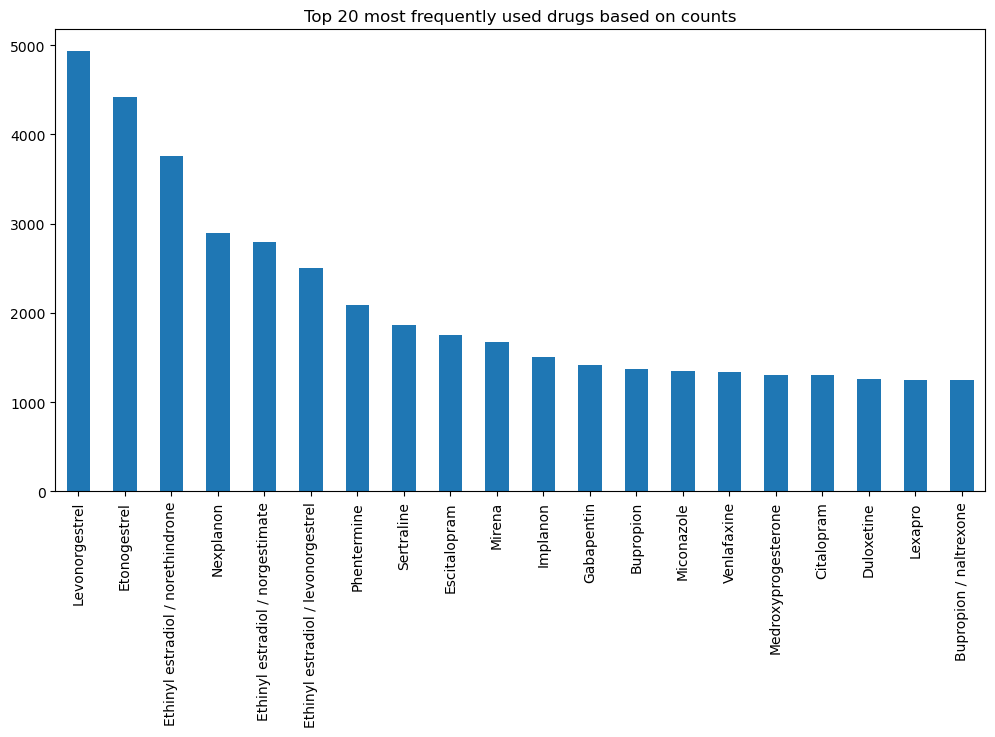

In [35]:
# Plotting top 20 most frequently used drugs
plt.figure(figsize=(12,6))
df['drugName'].value_counts().nlargest(20).plot(kind='bar')
plt.title("Top 20 most frequently used drugs based on counts")
plt.show()

- **Observation:** The list contains a mix of birth control methods and medications for mental health conditions.

#### Most frequently used drugs with 10/10 rating
- Source: https://www.kaggle.com/code/shubhamgadekar/complete-drug-review-analytics/notebook

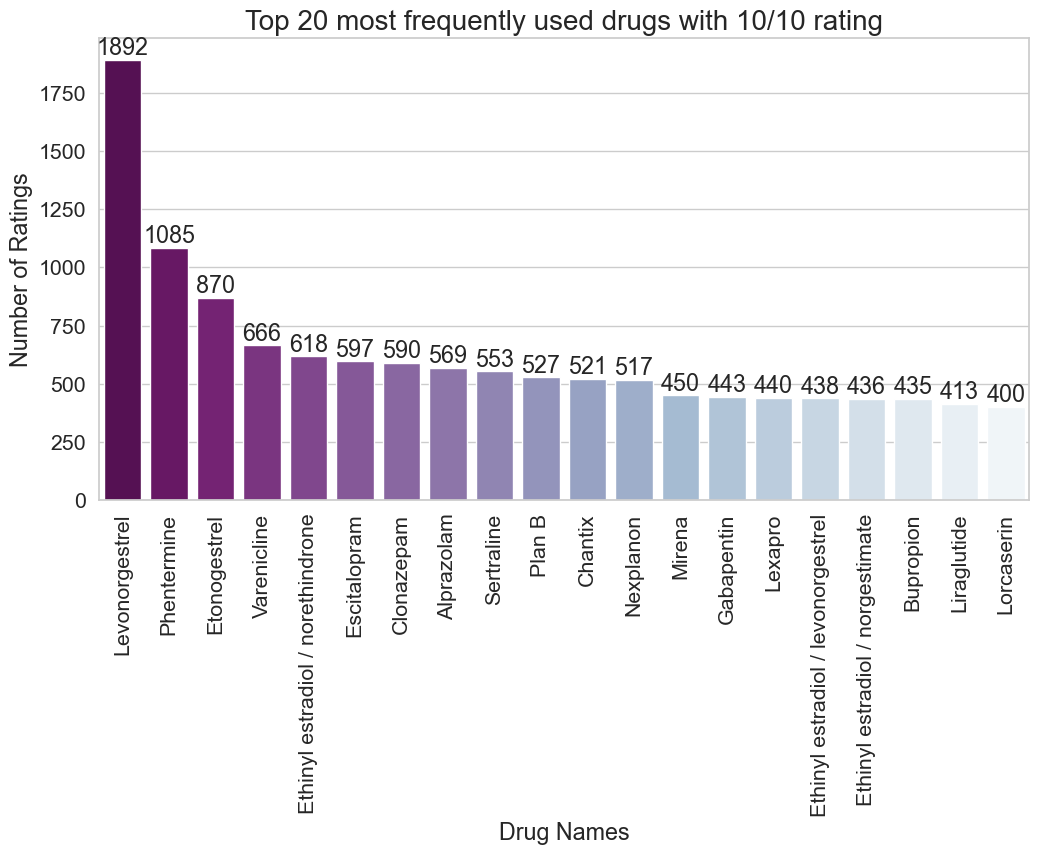

In [51]:
# Set figure size
plt.figure(figsize=(12,6))

# Count the number of drug ratings that are rated 10 and create a dictionary with drug names and their counts
rating = dict(df.loc[df.rating == 10, "drugName"].value_counts())

# Extract drug names and their corresponding ratings from the dictionary
drug_name = list(rating.keys())
drug_rating = list(rating.values())

# Create a barplot of the top 20 drugs with 10/10 rating
plt_rating = sns.barplot(x = drug_name[0:20], y = drug_rating[0:20], palette = 'BuPu_r')

# Add the count of each drug as a label to the bars in the plot
for i in plt_rating.containers:
    plt_rating.bar_label(i,)

# Set the title, x-axis label, and y-axis label of the plot
plt_rating.set_title('Top 20 most frequently used drugs with 10/10 rating', fontsize=20)
plt_rating.set_ylabel("Number of Ratings")
plt_rating.set_xlabel("Drug Names")

# Rotate the x-axis labels to prevent overlapping
plt.setp(plt_rating.get_xticklabels(), rotation=90)

# Display the plot
plt.show()

#### Most frequently used drugs with 1/10 rating

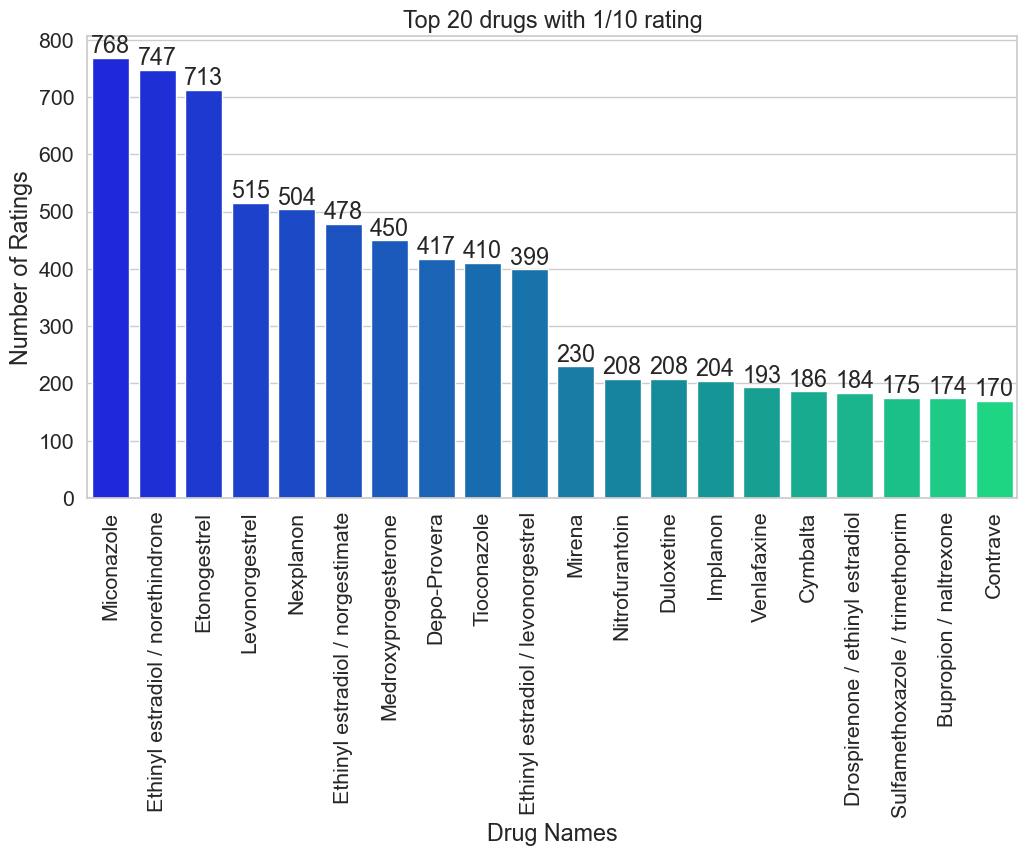

In [52]:
# Plotting 20 most frequently used drugs with 1/10 rating
plt.figure(figsize=(12,6))
rating = dict(df.loc[df.rating == 1, "drugName"].value_counts())
drug_name = list(rating.keys())
drug_rating = list(rating.values())

plt_rating = sns.barplot(x = drug_name[0:20], y = drug_rating[0:20], palette = 'winter')

for i in plt_rating.containers:
    plt_rating.bar_label(i,)

plt_rating.set_title('Top 20 drugs with 1/10 rating')
plt_rating.set_ylabel("Number of Ratings")
plt_rating.set_xlabel("Drug Names")
plt.setp(plt_rating.get_xticklabels(), rotation=90)
plt.show()

### Distribution of ratings

Text(0.5, 0, 'Rating')

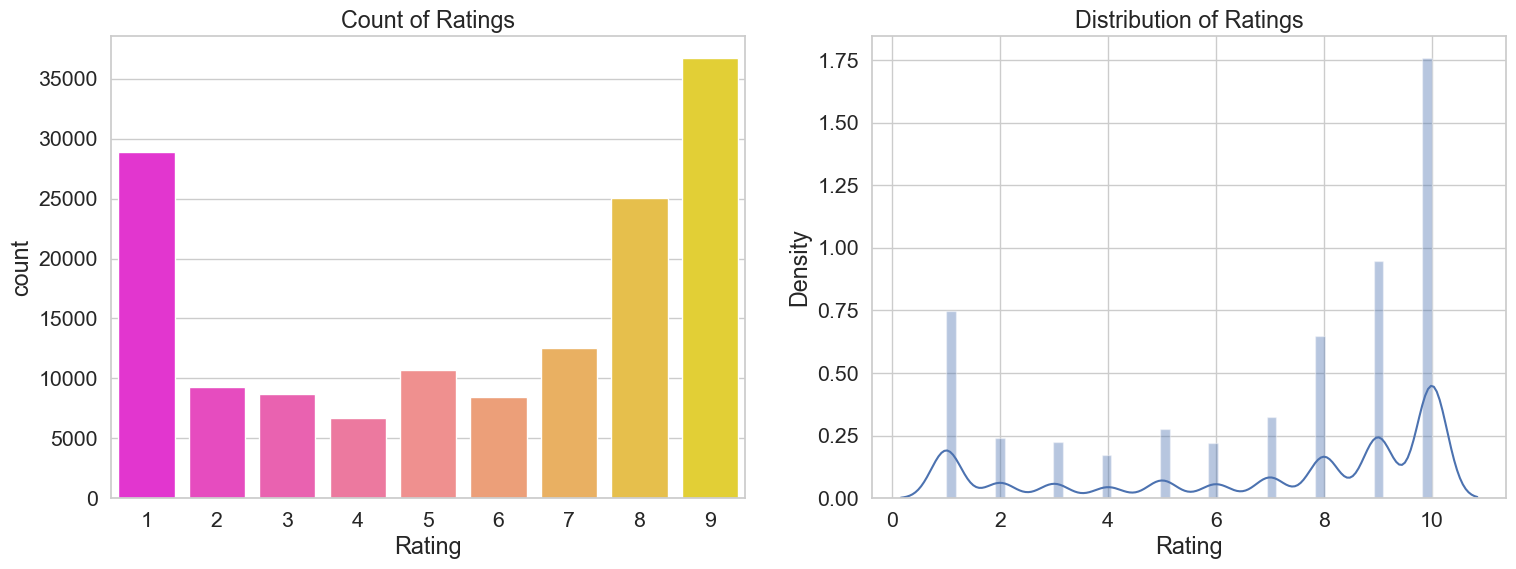

In [47]:
# A countplot of the ratings so we can see the distribution of the ratings

# Figure size and style
plt.rcParams['figure.figsize'] = [18,6]
sns.set(font_scale = 1.2, style = 'whitegrid')

# Creating subplots with two plots side by side
fig, ax = plt.subplots(1, 2)

# Creating count plot of ratings with specific order and color palette
plt_1 = sns.countplot(df['rating'], palette = 'spring', order = list(range(1, 10)), ax = ax[0])

# Histogram plot of ratings
plt_2 = sns.distplot(df['rating'], ax = ax[1])

# titles and labels for each plot
plt_1.set_title('Count of Ratings')
plt_1.set_xlabel("Rating")
plt_2.set_title('Distribution of Ratings')
plt_2.set_xlabel("Rating")


- **Observation:** We can see that most ratings are at the extremes (0 and 10). The distribution indicates that people might be more likely to review drugs they are either very satisfied or dissatisfied with. We see fewer ratings in the middle in comparison to extreme ratings.

### Average Rating of Drugs

In [70]:
# Calculating the average rating of all types of drugs
avg_drug_rating = (df['rating'].groupby(df['drugName']).mean())
avg_drug_rating

# source: https://www.kaggle.com/code/shubhamgadekar/complete-drug-review-analytics/notebook

drugName
A + D Cracked Skin Relief               10.000000
A / B Otic                              10.000000
Abacavir / dolutegravir / lamivudine     8.414286
Abacavir / lamivudine                   10.000000
Abacavir / lamivudine / zidovudine       9.000000
                                          ...    
ZzzQuil                                  2.000000
depo-subQ provera 104                    5.500000
ella                                     7.183099
femhrt                                   6.500000
pHisoHex                                10.000000
Name: rating, Length: 3671, dtype: float64

Text(0, 0.5, 'Count of Drug Types')

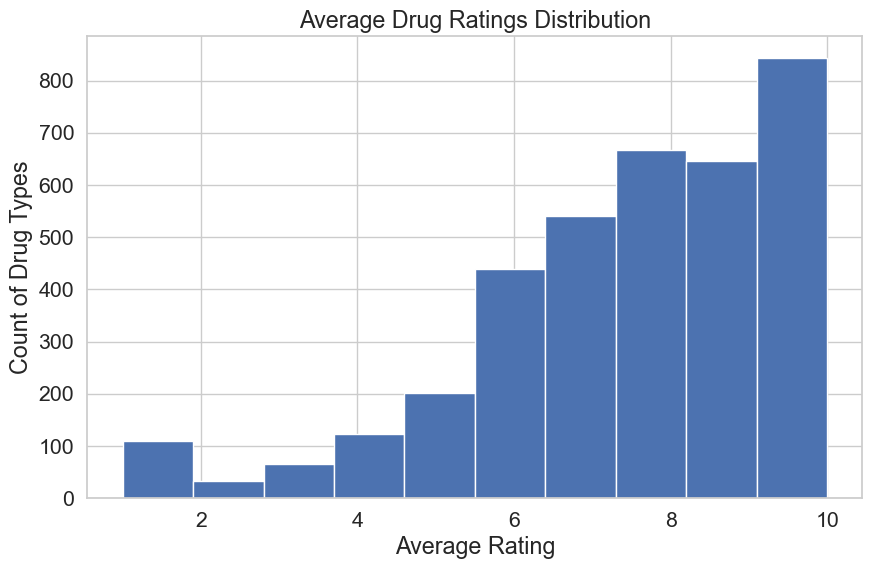

In [73]:
avg_drug_rating.hist()
plt.title('Average Drug Ratings Distribution')
plt.xlabel('Average Rating')
plt.ylabel('Count of Drug Types')

# Source: https://www.kaggle.com/code/neilash/team-ndl-algorithms-and-illnesses/notebook#Machine-Learning-Models

- **Observation:** Most patients have given ratings between 6 and 10.

### Average Rating of Drugs for Each Condition

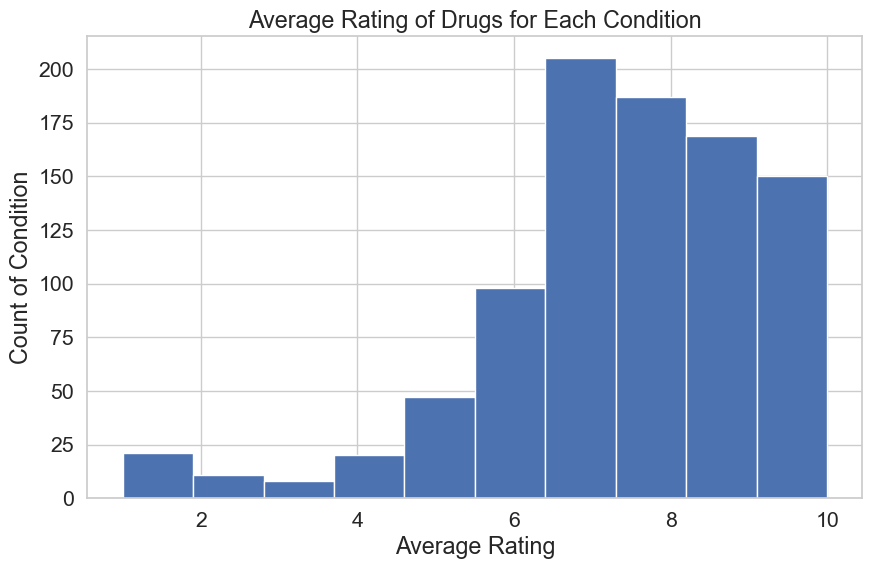

In [75]:
avg_drug_rating_cond = (df['rating'].groupby(df['condition']).mean())
avg_drug_rating_cond.hist()
plt.title('Average Rating of Drugs for Each Condition')
plt.xlabel('Average Rating')
plt.ylabel('Count of Condition')
plt.show()

### Conditions

In [61]:
# Total number of conditions
print("Total number of different conditions: {}".format(len(df['condition'].unique().tolist())))

Total number of different conditions: 917


- **Observation:** 917 different conditions present

#### Common conditions

In [48]:
# Sorting conditions by count
conditions = df.condition.value_counts().sort_values(ascending=False)
# Top 10 most common conditions
conditions[:10]

# Source: https://www.kaggle.com/code/neilash/team-ndl-algorithms-and-illnesses/notebook#Machine-Learning-Models

Birth Control      38436
Depression         12164
Pain                8245
Anxiety             7812
Acne                7435
Bipolar Disorde     5604
Insomnia            4904
Weight Loss         4857
Obesity             4757
ADHD                4509
Name: condition, dtype: int64

Text(0, 0.5, 'Count')

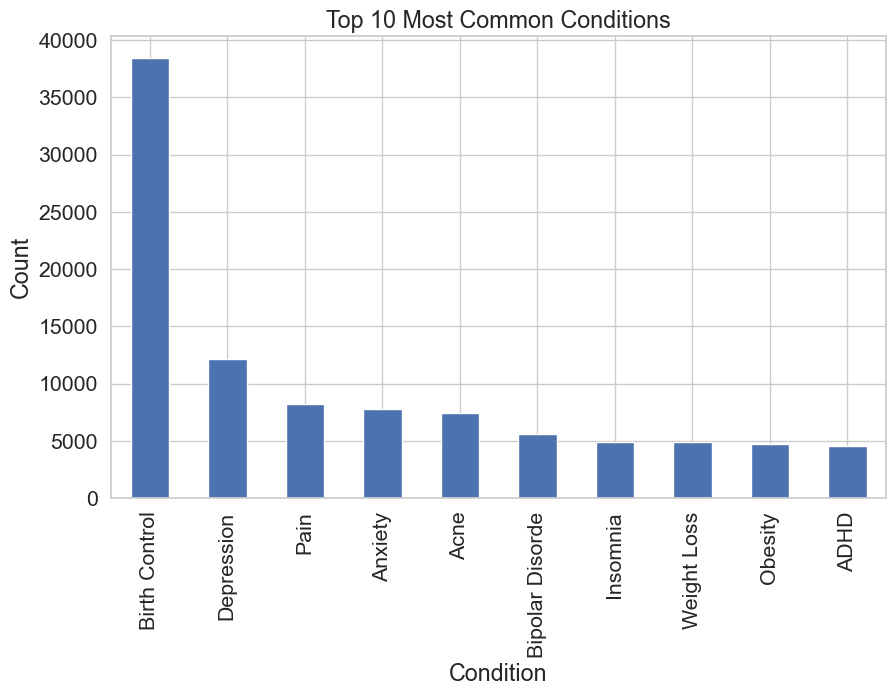

In [62]:
# Plotting most common conditions
plt.rcParams['figure.figsize'] = [10, 6]
conditions[:10].plot(kind='bar')
plt.title('Top 10 Most Common Conditions')
plt.xlabel('Condition')
plt.ylabel('Count')

#### Least common conditions

In [66]:
df['condition'].value_counts().nsmallest(20)

Gastric Cance                                   1
95</span> users found this comment helpful.     1
121</span> users found this comment helpful.    1
61</span> users found this comment helpful.     1
Q Feve                                          1
Diagnostic Bronchograms                         1
Asystole                                        1
Neoplastic Diseases                             1
Short Stature                                   1
Hypercalcemia                                   1
146</span> users found this comment helpful.    1
Neuritis                                        1
ungal Infection Prophylaxis                     1
Rabies Prophylaxis                              1
Linear IgA Disease                              1
Somat                                           1
Pertussis Prophylaxis                           1
38</span> users found this comment helpful.     1
135</span> users found this comment helpful.    1
Steroid Responsive Inflammatory Conditions      1


- **Observation:** We see that the phrase "3</span> users found this comment helpful" appears in the condition-column, which probably is an error. We will look into this in more detail below.

In [81]:
# Finding entries in the condition-column with the error
df[df['condition']=='3</span> users found this comment helpful.'].head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
243,81588,Yaz,3</span> users found this comment helpful.,"""I took Yaz for a little over 2 years. From a...",3,1-Jun-10,3
1864,124318,Skyla,3</span> users found this comment helpful.,"""Never pregnant,28,retroverted small (6cm) ute...",1,16-Dec-15,3
3322,202848,ProAir HFA,3</span> users found this comment helpful.,"""I get chest colds and asthmatic symptoms in t...",9,12-Dec-15,3
6355,195303,Low-Ogestrel-21,3</span> users found this comment helpful.,"""After taking it for two months I noticed some...",8,16-May-11,3
6968,230747,Tazorac,3</span> users found this comment helpful.,"""Started this 11 weeks ago. I am so so sad rig...",2,31-May-16,3


- We see that the phrase '</ span> users found this comment helpful.' occurs multiple times, and there are probably more instances with this error. We will address these instances in the preprocessing.

### Drugs per condition

Text(0.5, 1.0, 'Number of drugs per condition (Top 20)')

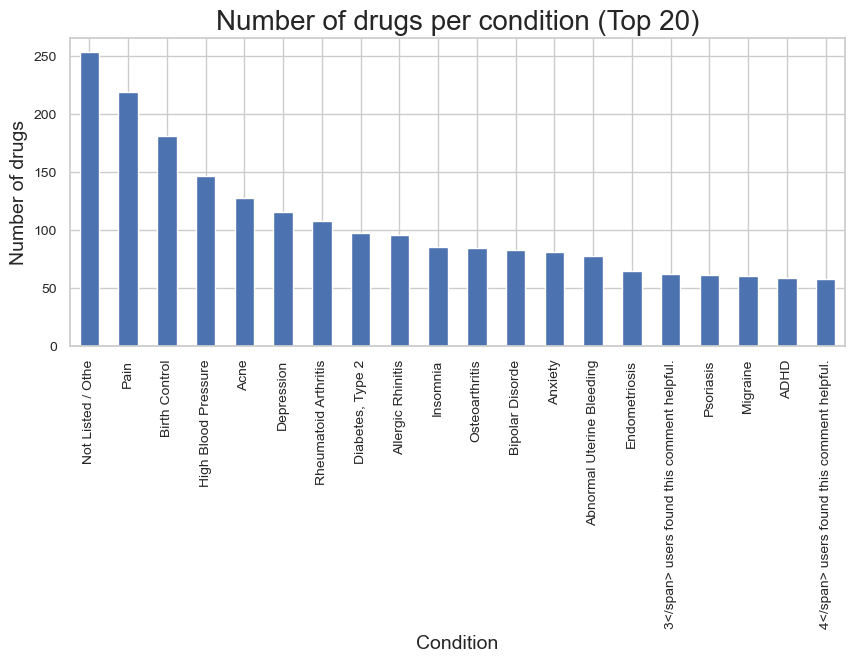

In [69]:
# Group dataframe by 'condition' and count the number of unique drugs per condition,  sort in descending order
drugs_per_condition = df.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)

drugs_per_condition[0:20].plot(kind="bar", figsize = (10,4), fontsize = 10)
plt.xlabel("Condition", fontsize = 14)
plt.ylabel("Number of drugs", fontsize = 14)
plt.title("Number of drugs per condition (Top 20)", fontsize = 20)

# Source: https://www.kaggle.com/code/chocozzz/recommendation-medicines-by-using-a-review/notebook

### Usefulness and Rating
Exploring whether rating is correlated with usefulness of the review.

([<matplotlib.axis.XTick at 0x7ff12ae719a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

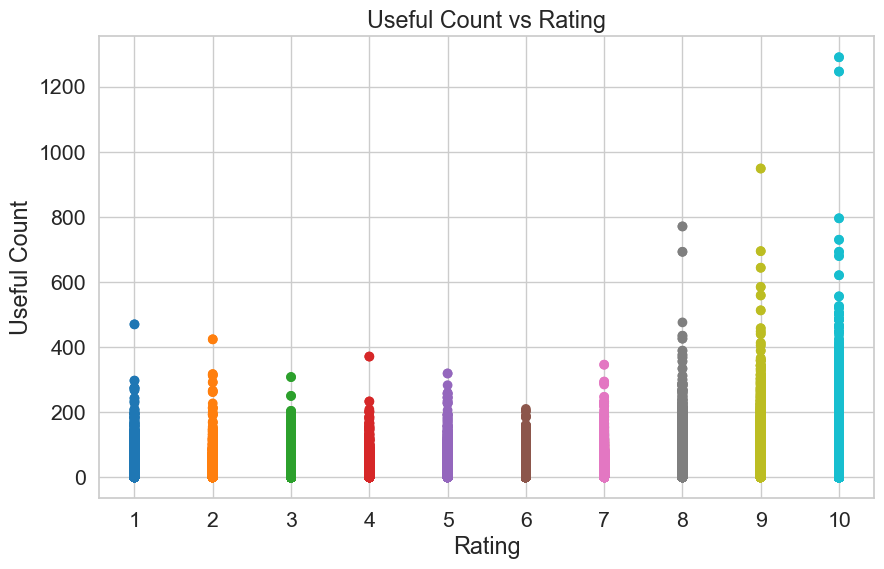

In [65]:
# Creating scatter plot to illustrate relation between ratings and useful count
plt.scatter(df.rating, df.usefulCount, c=df.rating.values, cmap='tab10')
plt.title('Useful Count vs Rating')
plt.xlabel('Rating')
plt.ylabel('Useful Count')
plt.xticks([i for i in range(1, 11)])

# Source: https://www.kaggle.com/code/neilash/team-ndl-algorithms-and-illnesses/notebook#Machine-Learning-Models

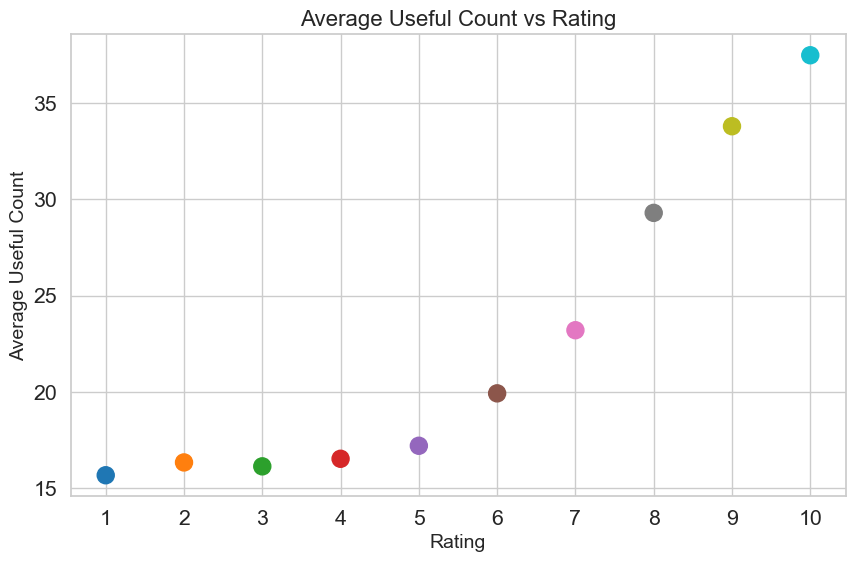

In [82]:
# Empty list to hold the rating and average usefulness for each rating
avg_usefulness_ls = []
# Iterate through the ratings 1-10
for i in range(1, 11):
    # Calculate avg. usefulness for reviews with given rating
    avg_usefulness = np.sum(df[df.rating == i].usefulCount) / np.sum([df.rating == i])
    # Append the rating and average usefulness to the list
    avg_usefulness_ls.append([i, avg_usefulness])
# Convert list to a numpy array for plotting
avg_usefulness_arr = np.asarray(avg_usefulness_ls)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x=avg_usefulness_arr[:, 0], y=avg_usefulness_arr[:, 1], c=avg_usefulness_arr[:, 0], cmap='tab10', s=150)
plt.title('Average Useful Count vs Rating', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Average Useful Count', fontsize=14)
plt.xticks(np.arange(1, 11))
plt.show()

# source: https://www.kaggle.com/code/neilash/team-ndl-algorithms-and-illnesses/notebook#Machine-Learning-Models

- **Observation:** It appears that reviews with higher scores received more 'useful' tags compared to reviews with lower ratings, indicating that people found reviews with higher ratings to be more useful.

### Correlation matrix

[None, None, None, None, None, None]

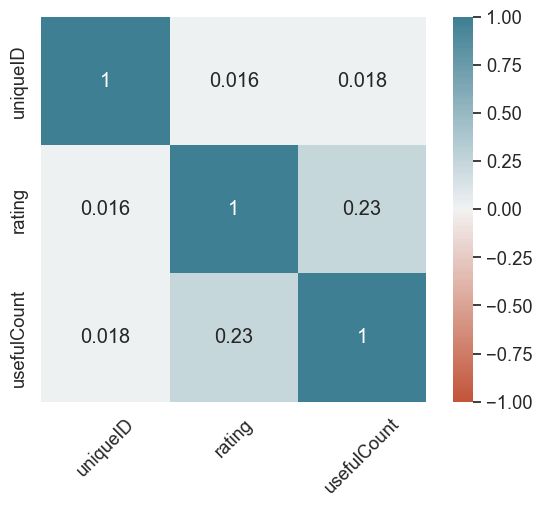

In [86]:
# Heatmap of correlation matrix
plt.rcParams['figure.figsize'] = [7,5]
sns.set(font_scale = 1.2)
corr = df.select_dtypes(include = 'int64').corr()
sns_heat = sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200), square=True)
plt.setp(sns_heat.get_xticklabels(), rotation = 45)

- **Observation:**  
    - *uniqueID* is not highly correlated with either rating or usefulCount - This attribute will be removed in preprocessing. 
    - We see some form of correlation between *rating* and *usefulCount*, which confirms the above diagrams showing that there is a pattern that higher reviews get higher usefulCounts. 

### Reviews

#### Character and word count

##### Reviews with rating 1-5

In [125]:
# Select reviews with rating 1-5
df_1_5 = df[df["rating"].isin([1, 2, 3, 4, 5])]

# Calculate average character length and word count
avg_char_length = df_1_5["review"].str.len().mean()
avg_word_count = df_1_5["review"].str.split().str.len().mean()

print("Average character length of reviews with rating 1-5: {:.2f}".format(avg_char_length))
print("Average word count of reviews with rating 1-5: {:.2f}".format(avg_word_count))

Average character length of reviews with rating 1-5: 448.33
Average word count of reviews with rating 1-5: 82.50


##### Reviews with rating 6-10

In [137]:
# Select reviews with rating 6-10
df_6_10 = df[df["rating"].isin([6, 7, 8, 9, 10])]

# Calculate average character length and word count
avg_char_length = df_6_10["review"].str.len().mean()
avg_word_count = df_6_10["review"].str.split().str.len().mean()

print("Average character length of reviews with rating 6-10: {:.2f}".format(avg_char_length))
print("Average word count of reviews with rating 6-10: {:.2f}".format(avg_word_count))

Average character length of reviews with rating 6-10: 463.01
Average word count of reviews with rating 6-10: 85.61


##### Average word counts for reviews for each rating

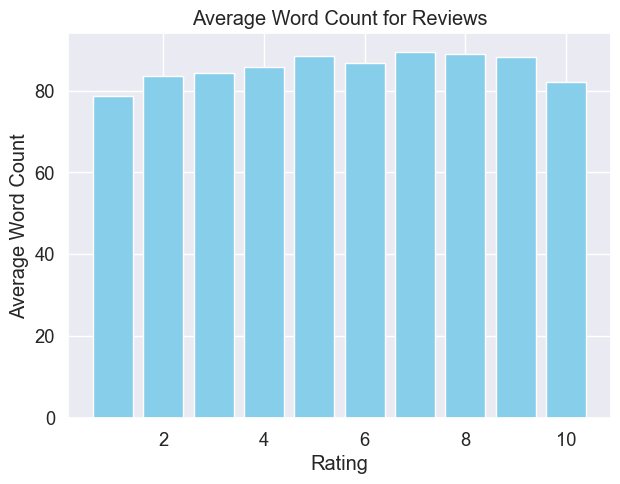

In [135]:
# Calculate the average word count for each rating
avg_wordcount = df.groupby('rating')['review'].apply(lambda x: x.str.split().str.len().mean()).reset_index()

# Create a bar plot
plt.bar(avg_wordcount['rating'], avg_wordcount['review'], color='skyblue')
plt.title('Average Word Count for Reviews')
plt.xlabel('Rating')
plt.ylabel('Average Word Count')
plt.show()

##### Average character count for reviews for each rating

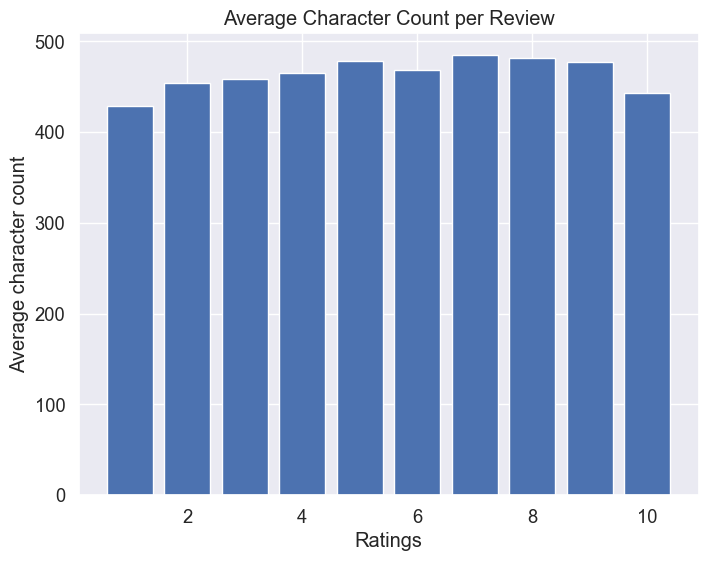

In [134]:
# Calculate the average character count for each review
avg_char_count = df.groupby('rating')['review'].apply(lambda x: x.str.len().mean())

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(avg_char_count.index, avg_char_count.values)
ax.set_xlabel('Ratings')
ax.set_ylabel('Average character count')
ax.set_title('Average Character Count per Review')
plt.show()

#### Wordclouds
##### Wordcloud of Reviews with Rating of 10

(-0.5, 799.5, 399.5, -0.5)

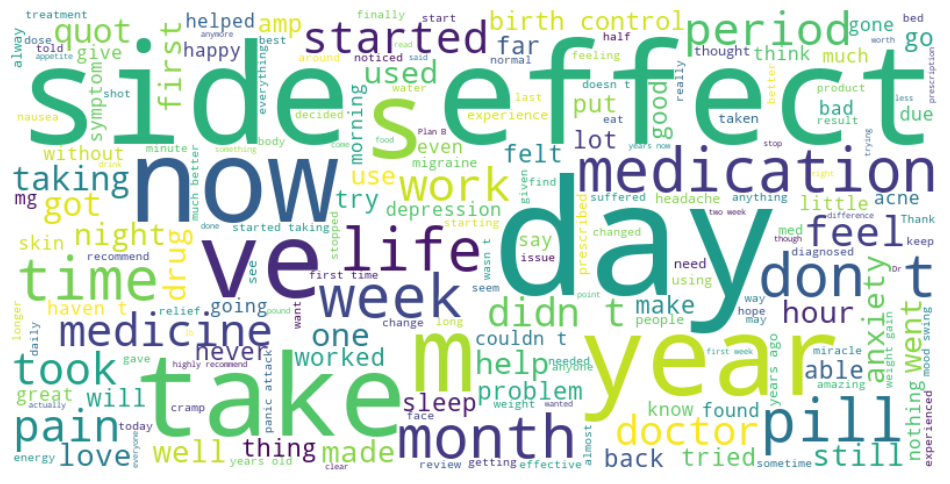

In [79]:
# Visualizing word cloud of reviews with a rating of 10
df_ten_rating = df.loc[df.rating == 10, 'review']
txt = (' '.join(df_ten_rating))

wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(txt)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

##### Wordcloud of Reviews with Rating of 1

(-0.5, 799.5, 399.5, -0.5)

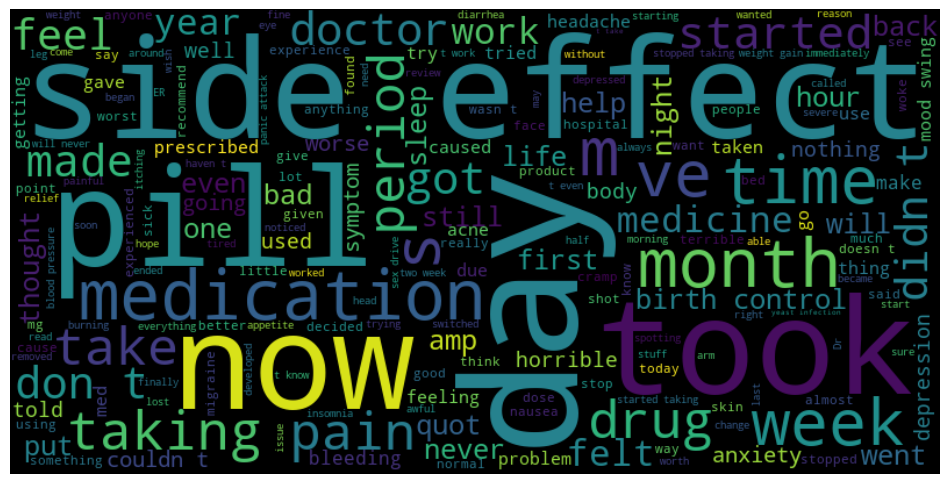

In [80]:
# Visualizing word cloud of reviews with a rating of 1
df_one_rating = df.loc[df.rating == 1, 'review']
txt2 = (' '.join(df_one_rating))

wordcloud = WordCloud(width = 800, height = 400).generate(txt2)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

#### N-grams

We will classify drug ratings 1 to 5 as negative and 6 to 10 as positive. Now we will analyze the effectiveness of 1 to 4 n-grams to identify the sentiment expressed in the text corpus.

In [84]:
# Creating two dataframes with ratings from 1-5 and 6-10 respectively
df_rating_1_5 = df[df["rating"]<6]
df_rating_6_10 = df[df["rating"]>5]


In [121]:
# Function for generating ngrams
def generate_ngrams(text, n_gram=1):
    # Tokenizing text by splitting it into individual words and removing any stop words
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    # Generating n-grams from the list of tokens using a zip function, which aggregates elements from each of the input lists
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    #  Return output list with all possible n-grams of the specified size (n_gram)
    return [" ".join(ngram) for ngram in ngrams]

## Function for bar chart
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        # set y-axis labels as the words in the df, in reverse order
        y=df["word"].values[::-1], 
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    # return the trace object for the chart
    return trace

## Function for creating trace object for ngram
def plot_ngram(df, n_gram, color):
    freq_dict = defaultdict(int)
    for sentence in df["review"]:
        for word in generate_ngrams(sentence, n_gram):
            freq_dict[word] += 1
    fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
    fd_sorted.columns = ["word", "wordcount"]
    trace = horizontal_bar_chart(fd_sorted.head(30), color)
    return trace

## Function for making subplots
def make_subplots(trace1, trace2, ngram):
    fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.03,
                          subplot_titles=[f"Top 30 {ngram} according for rating 1-5", 
                                          f"Top 30 {ngram} according for rating 6-10"])
    fig.append_trace(trace1, 1, 1)
    fig.append_trace(trace2, 1, 2)
    fig['layout'].update(height=600, width=1500, paper_bgcolor='rgb(233,233,233)', title=f"{ngram} Count Plots")
    return py.iplot(fig, filename='word-plots')

# source: https://www.kaggle.com/code/chocozzz/recommendation-medicines-by-using-a-review/notebook

#### Unigrams


In [120]:
trace_1_5 = plot_ngram(df_rating_1_5, 1, 'red')
trace_6_10 = plot_ngram(df_rating_6_10, 1, 'green')

# Creating subplots
make_subplots(trace_1_5, trace_6_10, "Unigram")

- **Observation:** If we analyze the text using 1-gram, we can observe that the top 5 words have similar content, although their order differs for negative and positive sentiments. This implies that analyzing text with a single corpus may not classify emotions effectively, hence we need to expand the corpus.

#### Bigrams

In [119]:
trace_1_5 = plot_ngram(df_rating_1_5, 2, 'red')
trace_6_10 = plot_ngram(df_rating_6_10, 2, 'green')

# Creating subplots
make_subplots(trace_1_5, trace_6_10, "Bigram")

- **Observation:** 
    - Similarly, for 2-grams, the top five corpus contain similar content, making it difficult to classify as positive or negative. 
    - Moreover, there is a difference in interpretation between 'side effects' and 'side effects.', indicating the need for pre-processing of review data. 
    - Nonetheless, it is evident that using 2-grams provides better emotional classification compared to the previous 1-grams, as exemplified by phrases like 'side effects', 'weight gain', and 'highly recommend'.

#### Trigrams

In [117]:
trace_1_5 = plot_ngram(df_rating_1_5, 3, 'red')
trace_6_10 = plot_ngram(df_rating_6_10, 3, 'green')

# Creating subplots
make_subplots(trace_1_5, trace_6_10, "Trigram")

- **Observation**
    - The 3-gram analysis shows a distinction between positive and negative corpus.
    - The following corpus were identified as classifiers for positive and negative: Bad side effects, birth control pills, negative side effects.
    - However, positive and negative parts may have missing parts that can reverse the context, such as the word 'not' in front of a corpus.

#### Fourgrams

In [122]:
trace_1_5 = plot_ngram(df_rating_1_5, 4, 'red')
trace_6_10 = plot_ngram(df_rating_6_10, 4, 'green')

# Creating subplots
make_subplots(trace_1_5, trace_6_10, "Fourgram")

- **Observation:** 
    - Using 4-gram significantly improves emotion classification compared to other n-grams.
    - This indicates that it might be optimal ti utilize 4-gram to construct our models

# Data Preprocessing

Remove uniqueID
Convert date 
We will perform some of the preprocessing steps only on the training set to prevent bias and data leakage from the test set.
https://towardsdatascience.com/all-you-need-to-know-about-text-preprocessing-for-nlp-and-machine-learning-bc1c5765ff67


In [ ]:
# Converting entries in 'date'-column into date-time format 
df['date'] = pd.to_datetime(df['date'])

### Null values

In [12]:
# Checking for null values
print ("Null values: ", df.isnull().sum(axis = 0))

Null values:  uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64


- There are 899 missing values in the 'condition' attribute

In [16]:
# Calculating percentage of null values
df_size = df.shape[0]
print ("Total Size of train set: ", df_size)

na_size = df.isnull().sum(axis = 0)['condition']
print ("Null values: ", na_size)

print("Percentage of null values: {:.2f} %".format((na_size/df_size)*100))

Total Size of train set:  161297
Null values:  899
Percentage of null values: 0.56 %


In [17]:
# Dropping  data entries with null values in 'condition'-column as it's much less than 5% of the whole dataset
df_data = df.dropna(how = 'any', axis = 0)

print ("Shape of training set after removal of null values:", df.shape)

Shape of training set after removal of null values: (161297, 7)


# Modeling

# Evaluation